In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Generate **requirements.txt**

In [ ]:
# Find all files needed to run this code
!pip freeze > requirements.txt

**Preprocessing of data** using os module

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = '/content/drive/MyDrive/Original Image'

# Images to be classified as:
Categories = ["FreshApple", "FreshBanana", "FreshGuava", "FreshJujube", "FreshOrange", "FreshPomegranate", "FreshStrawberry", "RottenApple", "RottenBanana", "RottenGuava", "RottenJujube", "RottenOrange", "RottenPomegranate", "RottenStrawberry"]

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))

  target_class = Categories.index(i)

  path = os.path.join(DataDirectory,i)
  # Image resizing, to ensure all images are of same dimensions
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # Skimage normalizes the value of image
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: FreshApple 	Label encoded as: 0
Category is: FreshBanana 	Label encoded as: 1
Category is: FreshGuava 	Label encoded as: 2
Category is: FreshJujube 	Label encoded as: 3
Category is: FreshOrange 	Label encoded as: 4
Category is: FreshPomegranate 	Label encoded as: 5
Category is: FreshStrawberry 	Label encoded as: 6
Category is: RottenApple 	Label encoded as: 7
Category is: RottenBanana 	Label encoded as: 8
Category is: RottenGuava 	Label encoded as: 9
Category is: RottenJujube 	Label encoded as: 10
Category is: RottenOrange 	Label encoded as: 11
Category is: RottenPomegranate 	Label encoded as: 12
Category is: RottenStrawberry 	Label encoded as: 13


In [ ]:
df = pd.DataFrame(flat_data)

df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.940603,0.514257,0.519344,0.933108,0.487409,0.489569,0.929990,0.497432,0.480921,0.921688,...,0.886150,0.625639,0.513417,0.867179,0.593391,0.497144,0.863512,0.606585,0.508095,0
1,0.527284,0.166838,0.110063,0.492766,0.165202,0.100472,0.451285,0.170946,0.097222,0.425685,...,0.492341,0.344304,0.274302,0.481335,0.334155,0.264771,0.489178,0.340480,0.262096,0
2,0.771622,0.454190,0.203491,0.736490,0.411357,0.183991,0.708363,0.351904,0.179537,0.676442,...,0.543479,0.369529,0.242792,0.537866,0.402702,0.324031,0.635247,0.552343,0.516629,0
3,0.996238,0.616673,0.476776,0.994322,0.617370,0.434536,0.993714,0.607131,0.396489,0.994749,...,0.690098,0.276738,0.250778,0.736951,0.359398,0.305876,0.732053,0.396007,0.322484,0
4,0.999098,0.999098,0.999098,0.998828,0.998828,0.998828,0.998998,0.998998,0.998998,0.999065,...,0.741554,0.800760,0.829822,0.739120,0.791374,0.823404,0.738402,0.782890,0.816600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,0.776524,0.768681,0.772603,0.774731,0.766904,0.770817,0.777404,0.769578,0.773488,0.780774,...,0.814044,0.806562,0.809975,0.817647,0.804938,0.808855,0.823299,0.807777,0.811699,13
2799,0.750590,0.744236,0.747413,0.749566,0.742303,0.745941,0.748943,0.744365,0.746668,0.747523,...,0.789625,0.787915,0.790545,0.794373,0.793255,0.794641,0.799229,0.792928,0.795061,13
2800,0.822194,0.822194,0.823024,0.824037,0.823981,0.830273,0.825457,0.823866,0.832413,0.822169,...,0.846643,0.841868,0.848615,0.843903,0.836360,0.841166,0.840330,0.832712,0.836538,13
2801,0.670986,0.666409,0.672549,0.671946,0.667761,0.670001,0.670841,0.667853,0.669288,0.671732,...,0.709428,0.702678,0.705925,0.706446,0.702415,0.704394,0.710200,0.702685,0.706442,13


AxesImage(size=(150, 150))


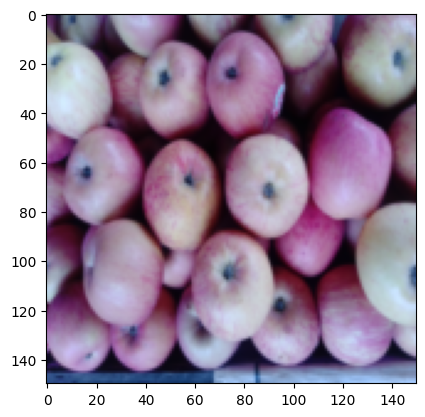

In [ ]:

print(plt.imshow(images[20]))

**Test and train dataset** creation using sklearn library functions
1.   Data is first split into input and output
2.   Input and Output are further split into testing and training data, individually



In [ ]:

from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (2803, 67500)
Output data dimensions: (2803,)
Dimensions of input training data: (1962, 67500)
Dimensions of input testing data: (841, 67500)
Dimensions of output training data: (1962,)
Dimensions of output testing data: (841,)


In [ ]:
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([140, 142, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140,
       140]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([60, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]))


**Classification** using SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3)
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.751 total time= 6.4min
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.791 total time= 6.3min
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.758 total time= 6.4min
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.776 total time= 6.3min
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.755 total time= 6.4min
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.738 total time= 3.7min
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.758 total time= 3.8min
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.753 total time= 3.9min
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.776 total time= 3.8min
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.747 total time= 3.8min
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.766 total time= 6.4min
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [ ]:
print("Best parameters to apply are:",cv.best_params_)

svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=100, gamma=0.0001)


In [ ]:
y_prediction = svm.predict(x_test)

In [ ]:
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [ 9 10  4  1  7 13 12  7 10  1  0  4 10 11 11 10 13  2  7  8  0  8 12  9
  0 13  4 13 12 10 11  4 10  9  8  6  6  3 10  5  3  3 10  2  9  1  2  0
 10 10  0  1 12  1 10 12 10  0  9  9  0 11  6  2 13  6 11  8 13  3  3  7
  1  0  1  8  7  6  5  6  5 11  5  3  2  8  3 10 13  0  2  8  0  6 11  0
  3  1  6  7 11  4 13  7 11  1  4  8  2  9 13  9  0  8 10  2  7 13 13  6
 13  4  8 10  5 12  1  3 10 11  5 13  1  8  2  1  9  9  8 13 13  0  7  0
  9  1  0  4 12  7  6 12  4 10  0 12  5  1  1  8  5 10 11  9  8  4 11 12
  6  0  7  3 12  9  9  0  0 11 10 10 12  1  5 13  6  1  0  6 13 11  2 11
  3  3 11  7  0  9 12  4 13  5 11  7  3  0  1  4 13 13 10  3 12  9 11  4
  3  7  6  6  4  7  4  0  7  3  0  1  1  7  1  9  0  8  2 11 13  1  3  9
 12  7  7  2 11  6  6 12 13  5  2 12 10  9  6  8  8  1  2  9 10 11  0  4
  0  3 11  9  3  9  2  8  9  4 11  5 13  9  3  2 10  8 13  3 12  4  8  8
  0  1  6  7 11  9  1  6 13 13  0 12  2 11  8 10 10  9  2  7  1 12  0  9
  9  7  0 13  8  4  6  3  5 12  

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[53  1  0  2  0  4  0  0  0  0  0  1  1  0]
 [ 0 55  2  1  1  0  0  1  1  2  0  0  0  1]
 [ 0  1 56  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  1 55  0  0  0  0  1  0  3  0  0  0]
 [ 0  0  0  1 55  0  0  0  0  0  0  2  0  0]
 [ 2  0  0  0  0 54  3  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  2 56  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 41  2  0  1  2  6  4]
 [ 0  1  1  1  0  0  0  4 49  0  1  0  1  2]
 [ 0  0  0  0  1  0  0  2  2 55  0  2  0  0]
 [ 0  0  0  0  0  0  0  1  1  2 53  1  3  1]
 [ 0  0  0  0  3  0  0  0  1  0  1 49  2  0]
 [ 3  0  0  0  0  0  1  8  0  0  0  0 43  7]
 [ 2  0  0  0  0  0  0  2  3  0  1  0  4 45]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.90      0.86      0.88        64
           2       0.93      0.98      0.96        57
           3       0.92      0.87      0.89        63
           4       0.92      0.95    

In [ ]:
import pickle
pickle.dump(svm,open("Classification_Model.p","wb"))

In [ ]:
test_model = pickle.load(open("Classification_Model.p","rb"))

In [ ]:
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)

img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)